In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

C:\Users\Acer\AppData\Local\Temp\ipykernel_1988\3129051807.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
coca=pd.read_excel("CocaCola_Sales_Rawdata.xlsx", sheet_name='Sheet1')
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [4]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
# We will extract Quarter values and Year values separately from 'Quarter column'
coca['Quarters']=0
coca['Year']=0
for i in range(42):
    p=coca["Quarter"][i]
    coca['Quarters'][i]=p[0:2]
    coca['Year'][i]=p[3:5]

In [7]:
coca.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [8]:
# Getting dummy variables for Q1,Q2,Q3,Q4
quarters_dummies = pd.DataFrame(pd.get_dummies(coca['Quarters']))
coca = pd.concat([coca,quarters_dummies],axis=1)
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,True,False,False,False
1,Q2_86,2244.960999,Q2,86,False,True,False,False
2,Q3_86,2533.804993,Q3,86,False,False,True,False
3,Q4_86,2154.962997,Q4,86,False,False,False,True
4,Q1_87,1547.818996,Q1,87,True,False,False,False


In [9]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     object 
 4   Q1        42 non-null     bool   
 5   Q2        42 non-null     bool   
 6   Q3        42 non-null     bool   
 7   Q4        42 non-null     bool   
dtypes: bool(4), float64(1), object(3)
memory usage: 1.6+ KB


<Axes: xlabel='Quarters', ylabel='Year'>

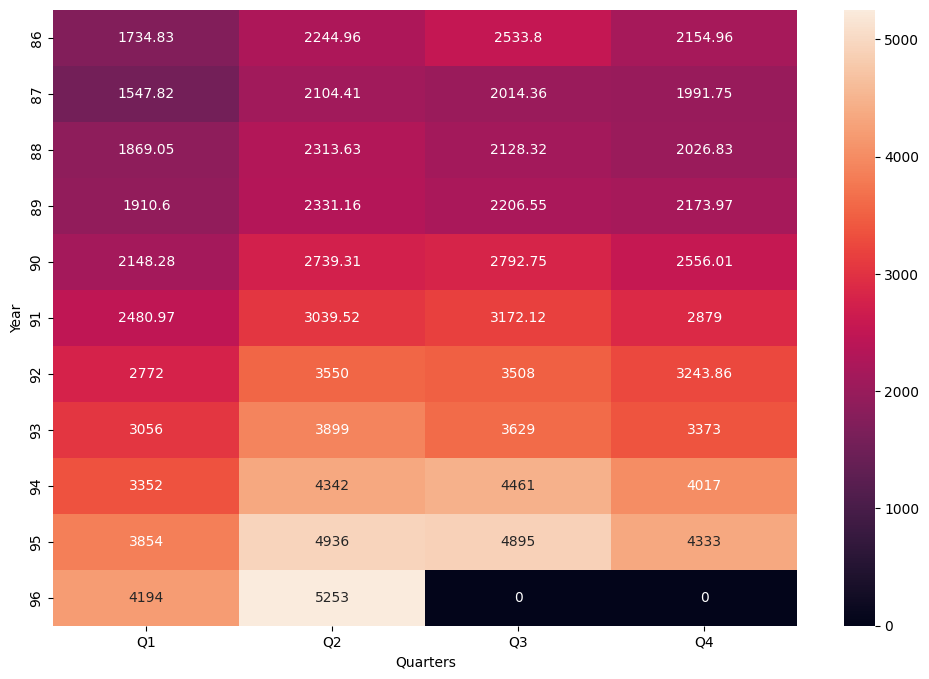

In [10]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_year = pd.pivot_table(data=coca,values="Sales",index="Year",columns="Quarters",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True,fmt="g")

<Axes: >

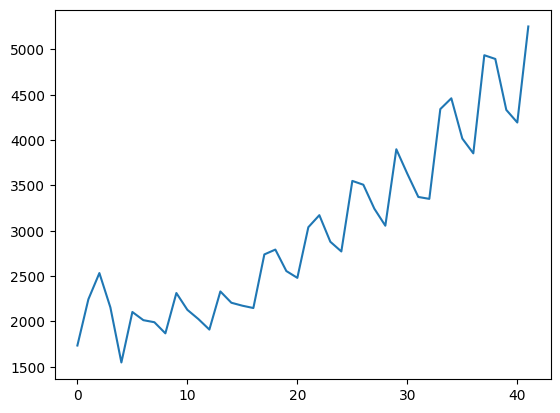

In [11]:
# Lineplot
coca.Sales.plot()

<Axes: >

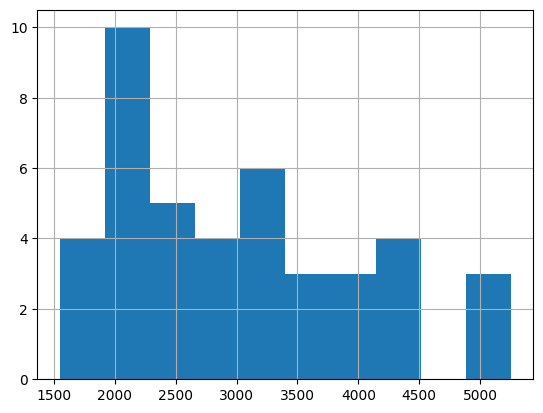

In [12]:
# Histogram
coca.Sales.hist()

<Axes: ylabel='Density'>

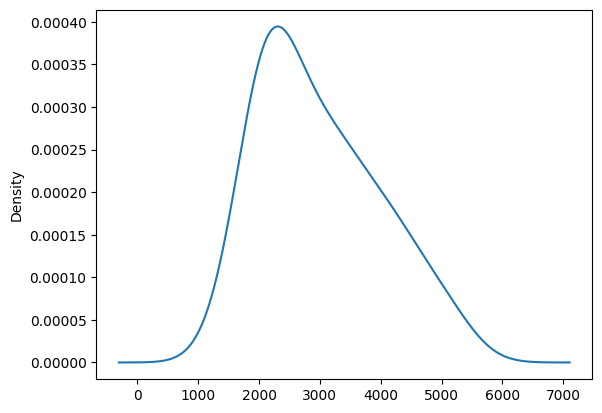

In [13]:
# Density Plot
coca.Sales.plot(kind='kde')

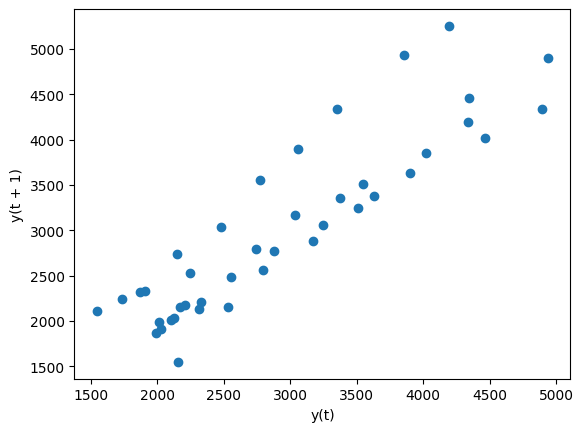

In [14]:
# Lag Plot
lag_plot(coca.Sales)
plt.show()

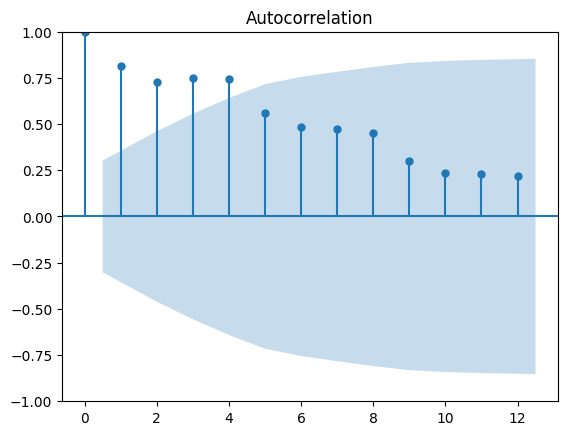

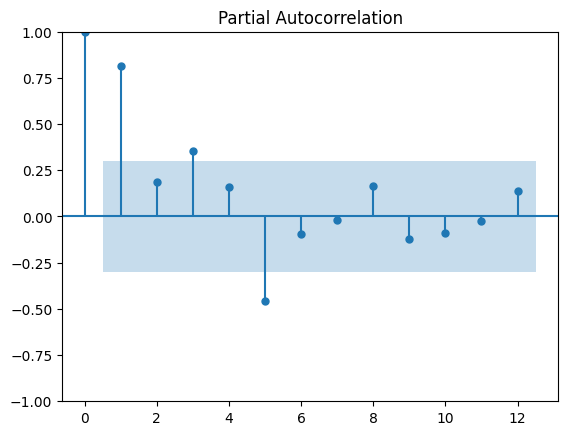

In [15]:
# ACF and PACF Plot
tsa_plots.plot_acf(coca.Sales,lags=12)
tsa_plots.plot_pacf(coca.Sales,lags=12)
plt.show()

<Axes: xlabel='Year', ylabel='Sales'>

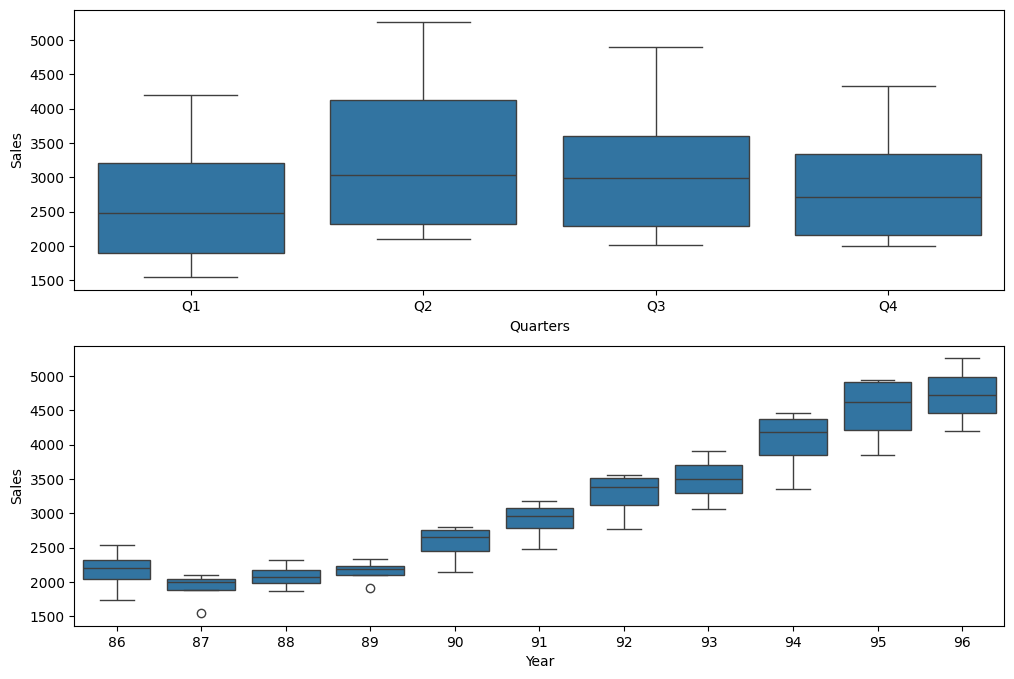

In [16]:
# Boxplot
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=coca)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=coca)

In [17]:
#Data Preprocessing for Models
coca["t"] = np.arange(1,43)
coca["t_squared"] = coca["t"]*coca["t"]
coca["log_sales"] = np.log(coca["Sales"])
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,True,False,False,False,5,25,7.344602


<Axes: xlabel='Year', ylabel='Sales'>

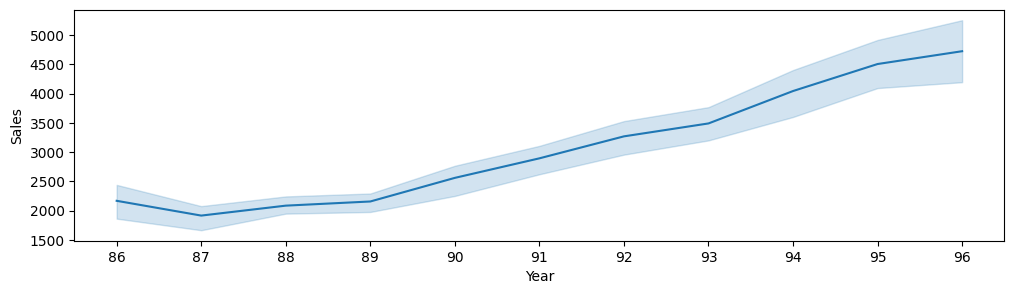

In [18]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=coca)

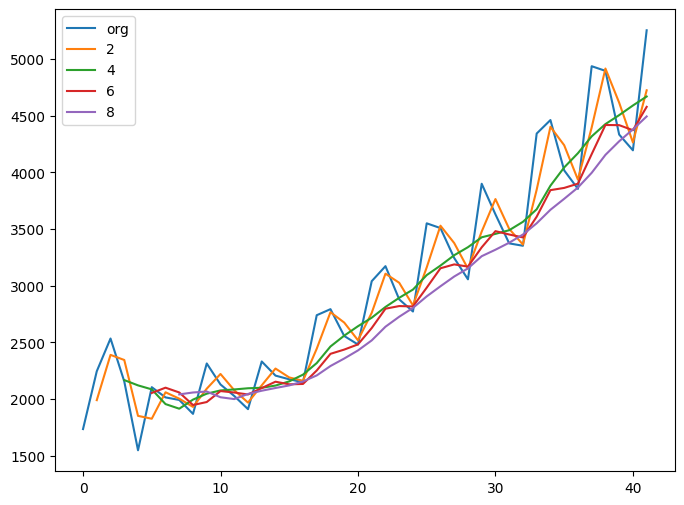

In [19]:
# Moving Average
plt.figure(figsize=(8,6))
coca.Sales.plot(label="org")
for i in range(2,10,2):
    coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<Axes: >

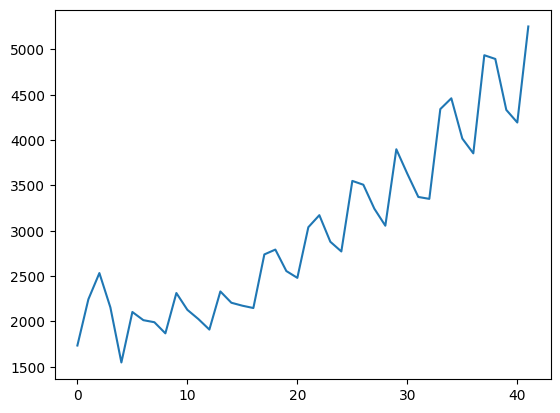

In [20]:
coca.Sales.plot()

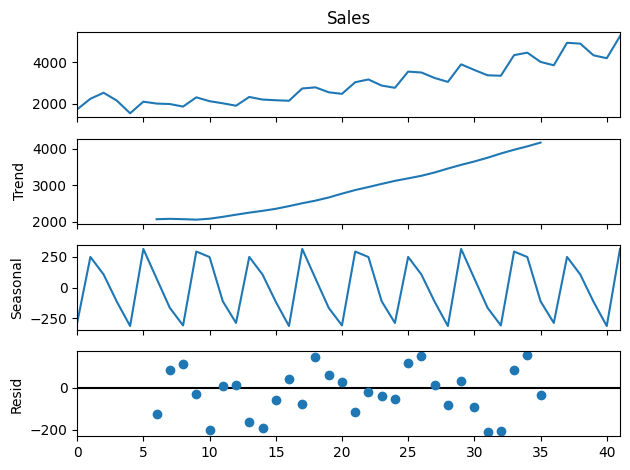

In [21]:
# Time coca Decomposition Plot
decompose_ts_add = seasonal_decompose(coca.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [22]:
# Splitting data
train = coca.head(32)
test = coca.tail(10)

In [23]:
# Linear Model
linear_model = smf.ols('Sales~t', data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767132

In [24]:
# Exponential Model
Exp = smf.ols('log_sales~t', data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432076668

In [25]:
# Quadratic 
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.7357355407288

In [26]:
# Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858349

In [27]:
# Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.3510771128632

In [28]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836113

In [29]:
# Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.86781826917735

In [30]:
# Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series(['rmse_linear','rmse_exp','rmse_Quad','rmse_add_sea','rmse_add_sea_quad','rmse_Mult_sea','rmse_Mult_add_sea'])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,rmse_Mult_add_sea
5,rmse_Mult_sea,rmse_Mult_sea
2,rmse_quad,rmse_Quad
3,rmse_add_sea,rmse_add_sea
4,rmse_add_sea_quad,rmse_add_sea_quad
1,rmse_exp,rmse_exp
0,rmse_linear,rmse_linear


In [31]:
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [32]:
# Create dummies and T and T-Squared columns
dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,5)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter     Q1     Q2     Q3     Q4  t  t_squared
0   Q3_96      Q3  False  False   True  False  1          1
1   Q4_96      Q4  False  False  False   True  2          4
2   Q1_97      Q1   True  False  False  False  3          9
3   Q2_97      Q2  False   True  False  False  4         16


In [33]:
# Forecasting using Additive Seasonality Quadratic Model
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=coca).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["forecasted_sales"] = pd.Series(pred_new)

In [34]:
# Final Prediction for next 4 Quarters
Final_predict = forecast1.loc[:, ['Quarter', 'forecasted_sales']] 
Final_predict

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547
